# Eigenface Gesichtserkennung
* Autor: Prof. Dr. Johannes Maucher
* Datum: 27.11.2015

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.html)

# Einführung
## Lernziele:

In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* __Gesichtserkennung:__ mit der Eigenface Methode. 
* __Principal Component Analysis__
* __Bildverarbeitung__ mit Python.

Sämtliche Verfahren und Algorithmen werden in Python implementiert.

## Theorie zur Vorbereitung

Die Gesichtserkennung kann mit unterschiedlichen Ansätzen realisiert werden. In diesem Versuch wird ausschließlich der _Eigenface_-Ansatz vorgestellt. Dieser Ansatz basiert auf der _Principal Component Analysis (PCA)_ und wurde erstmals in [M. Turk, A. Pentland; Eigenfaces for Recognition](http://www.cs.ucsb.edu/%7Emturk/Papers/jcn.pdf) vorgestellt. Die Eigenface-Methode weist eine gute Performance im Fall biometrisch aufgenommener Gesichtsbilder auf.

### Das Prinzip der Eigenface Gesichtserkennung

Bilder mit $C$ Pixeln in der Breite und $R$ Pixeln in der Höhe können als $R \times C$ Matrizen abgespeichert werden. Handelt es sich um ein Schwarz-Weiß- oder Graustufen-Bild, dann wird pro Bild nur eine derartige Matrix benötigt. Der Eintrag in der i.ten Zeile und j.ten Spalte dieser Matrix definiert den Grauwert des entsprechenden Pixels. In Farbbildern werden je nach benutztem Farbraum mehrere  Matrizen pro Bild benötigt, wobei jede Matrix einen Farbkanal des Bildes repräsentiert. Für ein RGB-Bild werden z.B. 3 Matrizen für die Farbkanäle Rot, Grün und Blau benötigt. \\

Im Folgenden wird von quadratischen Graubildern mit $N \times N$ Pixeln ausgegangen. Wird jedes Pixel als ein Merkmal betrachtet, dann existieren insgesamt $N^2$ Merkmale, das Bild kann auch als ein Punkt im $N^2$-dimensionalen Raum betrachtet werden. Bilder der Auflösung $256 \times 256$ müßten also im $65536$-dimensionalen Raum beschrieben werden. Entsprechend komplex wäre die notwendige Verarbeitung. Ist jedoch bekannt, dass in einer Menge von Bildern jeweils ein gleichartiges Objekt abgebildet ist, z.B. wenn alle Bilder ausschließlich je ein Gesicht enthalten, dann existieren große Abhängigkeiten zwischen diesen Bildern. Geometrisch ausgedrückt bedeutet dies, dass die Punkte, welche die Menge der gleichartigen Bilder beschreiben, nicht gleichmäßig über den $N^2$-dimensionalen Raum verteilt sind, sondern in einen relativ kleinen Unterraum mit $K<<N^2$ Dimensionen nahezu vollständig beschrieben werden können. Jede dieser $K$ Dimensionen beschreibt ein für die Kategorie (z.B. Gesichtsbilder) relevantes Merkmal. Im Fall der Gesichtserkennung werden die relevanten Merkmale auch als Eigenfaces bezeichnet. Jedes Eigenface kann als Bild dargestellt werden, welches ein bestimmtes Gesichtsmerkmal besonders hervorhebt. Jedes individuelle Bild der Kategorie (d.h. jedes Gesicht) kann dann als Linearkombination der $K$ relevanten Merkmale (der $K$ Eigenfaces) beschrieben werden.\\

Das Problem besteht nun zunächst darin, aus einer Menge von Bildern der gleichen Kategorie die relevanten Merkmale zu finden. Dieses Problem wird durch die Principal Component Analysis (PCA) gelöst. Die PCA, findet in einer Menge von Bildern der gleichen Kategorie die Hauptachsen, also die Richtungen im $N^2$-dimensionalen Raum, entlang derer die Varianz zwischen den gegebenen Bildern am stärksten ist. Der $N^2$-dimensionale Pixelraum wird dann in einen Raum, der durch die gefundenen Hauptachsen aufgespannt wird, transformiert. In diesem in der Anzahl der Dimensionen stark reduzierten Raum wird dann die Bilderkennung durchgeführt. Der hier skizzierte Ansatz der Eigenfaces für die Gesichtserkennung wurde erstmalig in [M. Turk, A. Pentland; Eigenfaces for Recognition](http://www.cs.ucsb.edu/%7Emturk/Papers/jcn.pdf) beschrieben.

### Genereller Ablauf

Die Gesichtserkennung besteht aus 2 Phasen. In der Trainingsphase werden die Gesichtsbilder der zu erkennenden Personen eingelesen und für diese mit der PCA der Eigenface-Raum berechnet. In der Erkennungsphase wird ein neu aufgenommenes Bild in den Eigenface-Raum transformiert und dort dem naheliegendsten Bild aus der Trainingsmenge zugeordnet.

#### Trainingsphase

1. Lese Gesichtsbilder der Personen, die erkannt werden sollen ein. Die Menge dieser Bilder definiert das Trainingsset
2. Berechne mit der PCA den Eigenface-Raum. Dabei werden nur die K Dimensionen, welche zu den Eigenvektoren mit den größten Eigenwerten gehören ausgewählt. Die zu den K Dimensionen (Eigenvektoren) gehörenden Bilder sind die Eigenfaces.
3. Transformiere jedes Bild der Trainingsmenge in den Eigenface-Raum und erhalte so die entsprechende Repräsentation des Bildes als Punkt im Eigenface-Raum.

#### Erkennungsphase

1. Transformiere das zu erkennende Bild in den Eigenface-Raum und berechne dort die Koordinaten des Bildes hinsichtlich aller K-Dimensionen (Eigenfaces)
2. Bestimme ob das zu erkennende Bild überhaupt eine Gesicht darstellt
3. Bestimme ob das Gesicht zu einer bekannten Person, deren Bild in der Trainingsmenge enthalten ist, gehört.

#### Update (optional)

Füge das erkannte Bild zur Menge der Trainingsbilder hinzu und führe die Schritte der Trainingsphase durch.

### Bestimmung der Eigenfaces
<a id='theoryEig'></a>
Es werden zunächst $M$ Gesichtsbilder der zu erkennenden Personen eingelesen (von jeder zu erkennenden Personen möglichst mehrere Bilder). Es wird davon ausgegangen, dass jedes der Bilder $C$ Pixel breit und $R$ Pixel hoch ist. Das Bild kann dann als $R \times C$ Matrix dargestellt werden. Im Fall eines Graustufenbildes repräsentieren die Pixelwerte den entsprechenden Grauwert. Nach dem Einlesen werden die Bildmatrizen als eindimensionale Vektoren dargestellt. Für diese Umformung werden die Zeilen jeder Matrix von oben nach unten ausgelesen und hintereinander gereiht. Jedes Bild wird dann durch einen Vektor der Länge $Z=R \cdot C$ repräsentiert und kann als Punkt im Z-dimensionalen Raum dargestellt werden. Die M Bildvektoren werden im folgenden mit $$\Gamma _1, \Gamma_2, \ldots, \Gamma_M$$ bezeichnet.

Im nächsten Schritt wird das Durchschnittsbild berechnet
$$
\overline{\Gamma}=\frac{1}{M}\sum_{i=1}^{M}{\Gamma_{i}}
$$

Dieses Durchschnittsbild wird von allen Bildern $\Gamma_i$ abgezogen. Die Menge der so gewonnenen Bildrepräsentationen
$$
\Phi_i=\Gamma_i - \overline{\Gamma}
$$

ist dann mittelwertsfrei. Die Menge  $\Phi_1, \Phi_2, \ldots, \Phi_M$ wird dann einer Principal Component Analysis (PCA) (siehe auch [J. Maucher; Feature Selection and Extraction](https://docs.google.com/document/d/13cc9RGeIvsV5JsC-MsymJ6aaJs_ZsUKEwqaOOO8IL8Q/edit?usp=sharing)) unterzogen. Hierzu werden die mittelwertfreien Bildrepräsentationen $\Phi_i$ in die Spalten einer Matrix geschrieben. Diese Matrix wird im Folgenden mit $X$ bezeichnet. Unter der Annahme, dass die $\Phi_i$ bereits als Spaltenvektoren vorliegen, ist die Matrix $X$ definiert als:

$$
X=\left[ \Phi_1, \Phi_2, \ldots, \Phi_M \right].
$$

Die entsprechende Kovarianzmatrix ist dann
$$
CV=X \cdot X^T.
$$

Für die PCA müssten als nächstes eigentlich die Eigenvektoren und Eigenwerte der Kovarianzmatrix $CV$ berechnet werden. Für den vorliegenden Fall kann allerdings die hierfür notwendige Berechnung aus Komplexitätsgründen nicht realisiert werden. Man beachte dass die Matrix $CV$  $Z$ Spalten und $Z$ Zeilen enthält ($Z$ ist die Anzahl der Pixel in einem Bild) und für diese $Z$ Eigenvektoren und Eigenwerte existieren. Wie in [M. Turk, A. Pentland; Eigenfaces for Recognition](http://www.cs.ucsb.edu/%7Emturk/Papers/jcn.pdf) beschrieben, existieren im Fall, dass die Anzahl der Bilder $M$ wesentlich kleiner als die Anzahl der Pixel $Z$ ist, nur $M-1$ __relevante Eigenvektoren__, die Eigenwerte aller anderen Eigenvektoren liegen nahe bei Null. Der in [M. Turk, A. Pentland; Eigenfaces for Recognition](http://www.cs.ucsb.edu/%7Emturk/Papers/jcn.pdf) beschriebene Ansatz geht nun von der $M \times M$ Matrix

$$
X^T \cdot X
$$

aus, für welche die Eigenvektoren und Eigenwerte für eine moderate Bildanzahl $M$ gut berechnet werden können. Per Definition gilt für die Eigenvektoren $\mathbf{v}_i$ und Eigenwerte $\mu_i$ dieser Matrix:

$$
X^T \cdot X \cdot \mathbf{v}_i = \mu_i \mathbf{v}_i .
$$

Werden beide Seiten dieser Matrix linksseitig mit der Matrix $X$ multipliziert,

$$
X \cdot X^T \cdot X \cdot \mathbf{v}_i = \mu_i X \mathbf{v}_i,
$$
dann ist daraus zu erkennen, dass die $M$ Vektoren
$$
\mathbf{u}_i=X \mathbf{v}_i
$$

die Eigenvektoren der Matrix $$CV=X \cdot X^T$$ sind. D.h. es können zunächst die M Eigenvektoren der relativ kleinen Matrix $X^T \cdot X$ bestimmt und aus diesen durch eine einfache Multiplikation mit der Matrix $X$ die relevanten Eigenvektoren der Matrix $CV$ berechnet werden. Da die Matrix $X$ die $M$ Bildrepräsentationen  $\Phi_i$ als Spalten enthält, können die gesuchten Eigenvektoren auch als Linearkombination der $M$ Bilder der Trainingsmenge beschrieben werden:

$$
\mathbf{u}_i=\sum_{k=1}^{M}{v_{i,k}\Phi_k}
$$

wobei mit $v_{i,k}$ die $k.$te Komponente des Vektors $\mathbf{v}_i$ bezeichnet wird. Die Eigenvektoren $\mathbf{u}_i$ werden auch Eigenfaces genannt. Per Definition sind die Eigenvektoren paarweise orthogonal. Jeder Eigenvektor ist ein Spaltenvektor mit $Z$ (=Anzahl der Pixel) Komponenten.

Die $M$ Eigenvektoren werden dann entsprechend der Größe der zugehörigen Eigenwerte $\mu_i$ geordnet. Für die weiteren Schritte kann zum Zwecke einer weiteren Komplexitätsreduktion eine Untermenge der $K$ relevantesten Eigenvektoren benutzt werden (also der $K$ Eigenvektoren mit den höchsten Eigenwerten). Beispielsweise ist in [M. Turk, A. Pentland; Eigenfaces for Recognition](http://www.cs.ucsb.edu/%7Emturk/Papers/jcn.pdf) für die Erkennung von $M=16$ Personen und eine Auflösung von $256 \times 256$ Pixel meist $K=7$ Eigenvektoren für eine gute Erkennung ausgereicht.

### Gesichtserkennung im Eigenspace
<a id='theoryRec'></a>

Die $K$ ausgewählten Eigenvektoren $\mathbf{u}_1,\mathbf{u}_2,\ldots \mathbf{u}_K$ spannen einen $K-$dimensionalen Raum, den sogenannten Eigenspace auf. Die $K$ Vektoren repräsentieren die $K$ Merkmale hinsichtlich derer die Bilder der Trainingsdatenmenge am stärksten variieren.

Für die Bilderkennung wird jetzt jedes Bild, also sowohl die Bilder aus der Trainingsmenge als auch die zu erkennenden Bilder, in den Eigenspace transformiert. Jedes Bild stellt einen Punkt im Eigenspace dar. Für die Erkennung kann einfach die Distanz des zu erkennenden Bildes zu allen Bildern der Trainingsmenge berechnet werden. Das zu erkennende Bild wird der Person (Bildklasse) zugeordnet, deren Punkt im Eigenspace dem Punkt des zu erkennenden Bildes am nächsten liegt.

Die $K$ Komponenten eines Trainingsbildes werden berechnet, indem das Bild auf den jeweiligen Eigenvektor projiziert wird. Demnach ist die $k.$te Komponente des $i.$ten Trainingsbildes  $\Phi_i$:
$$
\omega_{k,i}=\mathbf{u}_k^T \Phi_i
$$

Der dem Bild $\Phi_i$ entsprechende Punkt im Eigenspace ist dann
$$
\mathbf{w}_i=[\omega_{1,i},\omega_{2,i},\ldots,\omega_{K,i}]. 
$$

Wird mit $\Gamma$ das zu erkennende Bild und mit $\Phi=\Gamma - \overline{\Gamma}$ die um den Mittelwert der Trainingsbilder subtrahierte Version des Bildes bezeichnet, dann sind
$$
\omega_{k}=\mathbf{u}_k^T \Phi
$$

die Koordinaten der Projektion von $\Phi$ in den Eigenspace und der dieses Bild repräsentierende Punkt
$$
\mathbf{w}=[\omega_{1},\omega_{2},\ldots,\omega_{K}].
$$

Das zu erkennende Bild wird dann dem Trainingsbild $\Phi_j$ zugeordnet, für welches gilt:
$$
j=argmin_{i} \left\{ d(\mathbf{w},\mathbf{w}_i) \right\}
$$

wobei mit $d(\mathbf{w},\mathbf{w}_i)$ die euklidische Distanz zwischen den Projektionen von $\Phi$ und $\Phi_i$ bezeichnet wird.

__Optional:__ Falls $\Phi_i$ nicht das einzige Bild einer Person in der Trainingsmenge ist, sondern für die entsprechende Person mehrere Trainingsbilder vorliegen, wird in der Distanzberechnung nicht $\Phi_i$, sondern der Mittelwert über alle zu dieser Person gehörenden Bilder eingesetzt:

$$
\overline{\Phi}=\frac{1}{|W|}\sum_{w \in W}^{}{\Phi_w} .
$$

Dabei bezeichnet $W$ die Menge aller der Indizees $w$, für die die $\Phi_w$ zur gleichen Person gehören. Im Praktikumsversuch muss diese Option nicht implementiert werden. Die im folgenden Abschnitt beschriebene Versuchsdurchführung bezieht sich auf den Fall, dass nur die Distanz zu Einzelbildern berechnet wird und das nächstliegende Bild ausgegeben wird.

Für die Mindestdistanz
$$
\epsilon =\min_{i} \left\{ d(\Phi,\Phi_i) \right\}
$$

wird in der Regel eine Schwelle $T$ definiert. Wenn $\epsilon > T$ ist, also eine relativ große Distanz zwischen dem zu erkennenden Bild und dem nächstliegenden Bild aus der Trainingsmenge besteht, wird davon ausgegangen, dass es sich um ein unbekanntes Gesicht handelt. Optional könnte dieses unbekannte Gesicht in die Trainingsmenge aufgenommen werden.

Schließlich muss noch der Fall behandelt werden, dass das eingelesene Bild kein Gesicht darstellt. Aufgrund der starken Projektion vom ursprünglichen Bildraum in den Eigenspace kann dieser Fall nicht durch eine Schwelle auf den Fehler $\epsilon$ erkannt werden. Es kann durchaus sein, dass ein Nicht-Gesichtsbild in die Umgebung eines Gesichtsbild im Eigenspace projiziert wird. Ein Nicht-Gesichtsbild wird aber eine relativ große Distanz $d(\Phi,\Phi_f)$ zwischen

$$
\Phi=\Gamma - \overline{\Gamma}
$$
und der Repräsentation im Eigenspace
$$
\Phi_f=\sum_{k=1}^{K}{\omega_k}\mathbf{u}_k
$$
aufweisen. Durch die Definition einer weiteren Schwelle $S$ auf $d(\Phi,\Phi_f)$ kann also erkannt werden, ob es sich überhaupt um ein Gesicht handelt. Im Versuch ist davon auszugehen, dass nur Gesichtsbilder verwendet werden, d.h. es muss nur der Test gegen die Schwelle $\epsilon$ implementiert werden.


 ## Vor dem Versuch zu klärende Fragen
 
 * Was sind Eigenvektoren und Eigenwerte?

In [1]:
#Your markdown

* Was versteht man unter Eigenfaces?

In [2]:
#Your markdown

* Die PCA ist u.a. im entsprechenden Kapitel des Dokuments [J. Maucher; Feature Selection and Extraction](https://docs.google.com/document/d/13cc9RGeIvsV5JsC-MsymJ6aaJs_ZsUKEwqaOOO8IL8Q/edit?usp=sharing)) beschrieben. Wie kann mit der PCA eine Dimensionalitätsreduktion durchgeführt werden?

In [3]:
#Your markdown

* Wie werden mit dem Python Modul \emph{Image} Bilder in ein Python-Programm geladen?

In [4]:
#Your markdown

# Versuchsdurchführung

## Einlesen der Gesichtsbilder in Numpy Arrays
Laden Sie vom Skripteserver das Verzeichnis _Gesichtsbilder_ auf Ihren Rechner. Darin enthalten sind

* das Unterverzeichnis _training_, welches je 3 Bilder jedes Studenten enthält,
* das Unterverzeichnis _test_, welches die nicht in _training_ enthaltenen Bilder enthält. Ein Bild von jedem Studenten.

Mit der unten gegebenen Funktion _parseDirectory(directoryName,extension)_ wird eine Liste aller Dateinamen des Typs _extension_ im Verzeichnis _directoryName_ angelegt.

__Aufgabe:__

1. Legen Sie mit dieser Funktion eine Liste mit allen Dateinamen des Typs _extension='.png'_ im Verzeichnis _training_ (enthält die Trainingsbilder) an.
2. Implementieren Sie eine Funktion _readImageToNumpyData(imageList)_, der eine Liste aller Dateinamen der Trainingsbilder übergeben wird. Die Funktion gibt ein Numpy-Array zurück. Jede Zeile dieses Arrays enthält ein _.png_-Bild in serialisierter Form. Hierzu ist jedes einzelne Bild zunächst mit der Funktion [_matplotlib.image.imread(filename)_](http://matplotlib.org/1.3.0/users/image_tutorial.html) in ein zweidimensionales Numpy Array _img_ zu lesen. Durch den Aufruf von _img.shape=(1,-1)_ wird das zweidimensionale Numpy Array zu einem eindimensionalen Array serialisiert. Danach muss eine Normierung aller Werte in den Bereich zwischen 0 und 1 durchgeführt werden. Hierzu müssen alle Pixelwerte eines Bildes durch den im jeweiligen Bild vorkommenden Maximalwert geteilt werden.  

In [5]:
%matplotlib inline
from os.path import isdir,join,normpath
from os import listdir
import numpy as np
from numpy import linalg as LA
from matplotlib import pyplot as plt
from matplotlib import image as mplimg
import os
from sklearn import preprocessing

In [6]:
def parseDirectory(directoryName,extension):
    '''This method returns a list of all filenames in the Directory directoryName. 
    For each file the complete absolute path is given in a normalized manner (with 
    double backslashes). Moreover only files with the specified extension are returned in 
    the list.
    '''
    if not isdir(directoryName): return
    imagefilenameslist=sorted([
        normpath(join(directoryName, fname))
        for fname in listdir(directoryName)
        if fname.lower().endswith('.'+extension)            
        ])
    return imagefilenameslist

def readImageToNumpyData(imageList):
    imgs = []
    for i in range(len(imageList)):
        img = mplimg.imread(imageList[i])
        img.shape = (1,-1)
        nmax = np.amax(img)
        nmin = np.min(img)
        for j in range(len(img)):
            img[j] = (img[j]  - nmin) / (nmax - nmin)
        imgs.append(img)
    return imgs


In [7]:
imgNameList = parseDirectory("Gesichtsbilder/training/", "png")
images = readImageToNumpyData(imgNameList)

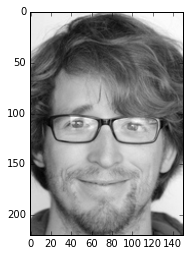

In [8]:
imgplot = plt.imshow( np.reshape( images[0], (220,150) ), cmap="gray")

## Berechnung des Durchschnittbildes

__Aufgaben:__

1. Die von der Funktion _convertImgListToNumpyData(imgList)_ zurückgelieferte Matrix enthält in ihren Zeilen alle Trainingsbilder. Aus diesen Trainingsbildern ist nach der Gleichung für [$\overline{\Gamma}$](#theoryEig) das Durchschnittsbild zu berechnen, z.B. durch Anwendung der Numpy-Funktion _average_. Das Durchschnittsbild ist von allen Bildern abzuziehen (Gleichung [$\Phi_i$](#theoryEig)). Das daraus resultierende Numpy-Array enthält die mittelwertfreien Repräsentationen der Trainingsbilder und wird im Folgenden mit _NormedArrayOfFaces_ bezeichnet.

2. Zeigen Sie das Durchschnittsbild mithilfe der [matplotlib.pyplot_-Funktion _imshow()](http://matplotlib.org/1.3.0/users/image_tutorial.html) an. Hierzu muss das eindimensionale Numpy Array, welches das Durchschnittsbild enthält, in ein zweidimensionales Array der ursprünglichen Bildgröße umgewandelt werden (Numpy Funktionen _shape()_ oder _reshape()_)  

__Wichtiger Hinweis:__ Das Numpy-Array __NormedArrayOfFaces__ ist die Transpornierte $X^T$ der Matrix $X$ aus Gleichung [$X$](#theoryEig).

In [9]:
def getAverageFace(imageList):
    eugen = np.zeros((1,220*150))
    for i in range(len(images)):
        eugen += images[i] 
    eugen = eugen / len(images)
    return eugen

def normaliceFaces(imageList):
    eugen = getAverageFace(imageList)
    for i in range(len(imageList)):
        imageList[i] = imageList[i] - eugen
    return np.asarray(imageList).reshape(63,33000)

In [10]:
NormedArrayOfFaces = normaliceFaces(images)

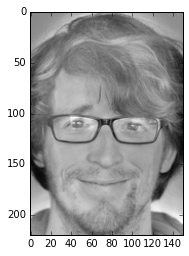

In [11]:
imgplot = plt.imshow( np.reshape( NormedArrayOfFaces[0], (220,150) ), cmap="gray")

## Berechnung der Eigenfaces

__Aufgaben:__

1. Implementieren Sie die Funktion _calculateEigenfaces(adjfaces,width,height)_. Dieser Funktion werden die normierten Bilder _NormedArrayOfFaces_ zusammen mit der Bildbreite und -höhe übergeben. Zurück liefert die Funktion ein Numpy-Array, dessen Zeilen die berechneten normierten Eigenfaces sind. Die Berechnung der Eigenfaces ist im Theorieteil Abschnitt [Bestimmung der Eigenfaces](#theoryEig) beschrieben. Für die Python-Implementierung können Sie folgende Hinweise berücksichtigen:
    * Berechnung der transponierten eines Numpy-Arrays $A$ mit der Numpy-Methode _transpose()_
    * Matrixmultiplikation zweier Numpy-Arrays $A$ und $B$ mit der Numpy-Funktion _dot()_
    * Berechnung der Eigenvektoren und Eigenvalues eines Numpy Arrays $A$ mit der Numpy-Funktion _linalg.eigh()_
    * Sortierung von Numpy-Arrays mit den Numpy-Funktionen _sort()_ und _argsort()_.
2. Aus dem von der Funktion _calculateEigenfaces(adjfaces,width,height)_ zurück gelieferten Array von Eigenfaces sind die $K$ relevantesten auszuwählen. Dieses reduzierte Array wird im Folgenden mit _Usub_ bezeichnet. Im Versuch kann $K=6$ eingestellt werden.
3. Zeigen Sie die $K=6$ wichtigsten Eigenfaces als Bilder mit der [matplotlib.pyplot_-Funktion _imshow()](http://matplotlib.org/1.3.0/users/image_tutorial.html) an.

In [92]:
def calculateEigenfaces(normedImageList, width=150, height=220):
    CVm = np.dot( normedImageList, normedImageList.transpose()) 
    eigenvalues, eigenvectors = LA.eigh(CVm)
    chosen = eigenvectors[:,-6:]  
    return np.dot(chosen.T, normedImageList)

In [93]:
eugens = calculateEigenfaces(NormedArrayOfFaces)

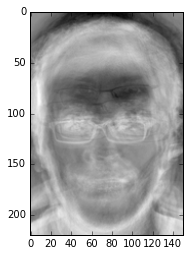

In [108]:
imgplot = plt.imshow( np.reshape( eugens[0], (220,150) ), cmap="gray")

## Transformation der normierten Trainingsbilder in den Eigenface Raum

__Aufgabe:__

Die im vorigen Schritt angelegten $K$ relevantesten Eigenfaces spannen den sogenannten _Eigenface-Raum_ auf. Für jedes der normierten Trainingsbilder, also für jede Zeile aus _NormedArrayOfFaces_, sind die Koordinaten im Eigenface-Raum entsprechend der Gleichung für [$\omega_{k,i}$](#theoryRec) definierten Transformation zu berechnen.

In [ ]:
#Your Code

## Erkennung

__Aufgaben:__

1. Wählen Sie ein Bild aus dem Verzeichnis _test_ aus. Das ausgewählte zu erkennende Bild ist als Numpy-Array darzustellen. Eine Normierung der Pixelwerte in den Bereich zwischen 0 und 1 ist durchzuführen (wie bereits oben beschrieben). Schließlich muss auch von diesem Bild das Durchschnittsbild aller Trainingsbilder abgezogen werden. Diese Prozessschritte entsprechen der oben beschriebenen Vorverarbeitung der Trainingsbilder. Das resultierende normierte und mittelwertfreie Bild wird im Folgenden mit _NormedTestFace_ bezeichnet.
3. Danach sind die Koordinaten des _NormedTestFace_ im Eigenface-Raum nach Gleichung [$\omega_{k}$](#theoryRec) zu berechnen und das in diesem Raum nächstliegende Trainingsbild zu bestimmen.

In [ ]:
#Your Code

__Aufgaben:__
1. Führen Sie die implementierte Gesichtserkennung für alle Bilder im Verzeichnis _test_ aus. Zeigen Sie jeweils das Testbild, das zugehörige erkannte Bild und die Distanz zwischen beiden Bildern an.
2. Bestimmen Sie für die Werte $K=5,K=10$ und $K=15$ ($K$ ist die Anzahl der verwendeten Eigenfaces) die Rate falsch erkannter Bilder. 